<h1 align="center">Heart Attack Prediction with Machine Learning Models</h1>

#### This project's main goal is to determine the best machine learning algorithm for predicting heart attacks with the given data. 
#### The work performed for this project was done by Steve Sedowski.

### Table of Contents 
1. [Overview](#1)
2. [Variable Descriptions](#2)
3. [Initial Code and Analysis](#3)
    * 3.1 [Python Libraries](#4)
        * 3.1.1 [Basic Python Libraries](#5)
    * 3.2 [Load the Data](#6)
    * 3.3 [Initial Data Analysis](#7)
    * 3.4 [Unique Value Analysis](#8)
    * 3.5 [Examining Variable Statistics](#9)
    * 3.6 [Exploratory Data Analysis of Numerical Data](#10)
    * 3.7 [Categorical Variable Analysis w/ Pie Chart](#11)
    * 3.8 [Missing Data Analysis](#12)
    * 3.9 [Bi-variate Analysis](#13)
        * 3.9.1 [Bi-variate Analysis of Numerical Data](#14)
        * 3.9.2 [Bi-variate Analysis of Categorical Data](#15)
    * 3.10 [Pair Plot Analysis of Numerical Data](#16)
    * 3.11 [RobustScaler to Nullify Outlier Influence](#17)
    * 3.12 [Melt Function w/ Scaled Data](#18)
    * 3.13 [Swarm Plot Analysis of Numerical Data](#19)
    * 3.14 [Heat Map of All Variables](#20)
4. [Machine Learning Model Preparation](#21)
    * 4.1 [Outlier Procedures](#22) 
        * 4.1.1 [Function to Detect Outliers](#23)
    * 4.2 [Removing Thalach Outliers](#24)
    * 4.3 [Numeric Variable Distributions](#25)
    * 4.4 [Skew Distribution Analysis](#26)
    * 4.5 [Unsymmetrical Data Transformation](#27)
    * 4.6 [One Hot Encoding Method for Categorical Data](#28)
    * 4.7 [Scale Numeric Data](#29)
5. [Machine Learning Models](#30)
    * 5.1 [Test and Training Data](#31)
    * 5.2 [Logistic Regression Model](#32)
    * 5.3 [Test Reliability of Model with Cross Validation](#33)
    * 5.4 [Measure Model Performance with ROC Curve and AUC](#34)
    * 5.5 [Hyperparameter Optimization Fine Tuning](#35)
    * 5.6 [Decisin Tree Model](#36)
    * 5.7 [Support Vector Machine Algorithm](#37)
    * 5.8 [5.8 Random Forest Algorithm](#38)
6. [Conclusion](#40)

### 1. Overview <a id=1></a>
Use machine learning techniques to analyze and possibly predict heart attacks, also known as myocardial infarctions, with the dataset: <b><i><a href="https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data">Heart Attack Analysis & Prediction Dataset</a></i></b>. Blood flow that is blocked to or in the heart or other cause of circulation disruption can lead to myocardial infarctions. Symptoms of myocardial infarctions can vary between men and women:
<img src="has.png" style="" />

### 2. Variable Descriptions <a id=2></a>
1. age - age in years

2. sex - sex (1 = male; 0 = female)

3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic). Angina is a type of chest pain caused by reduced blood flow to the heart. 

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)

5. chol - serum cholestoral in mg/dl

6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest. ST depression refers to a finding on an electrocardiogram wherein the trace in the ST segment is abnormally low below the baseline. Clinically speaking, the ST segment represents the period in the cardiac cycle when the muscular layer of the heart maintains contraction to expel blood from the ventricles. There are a number of things that can cause a person to have ST depression in their ECG results.

11. slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

12. ca - number of major vessels (0-3) colored by flourosopy

13. thal - 2 = normal; 1 = fixed defect; 3 = reversable defect

14. output - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing). Where 0 = less of a chance of a heart attack and 1 = more of a chance of a heart attack. 

NOTE: These 
<a href="https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/discussion/234843">descriptions</a> were provided by: jaykumar1607, Jay, Data Scientist I at Optum, Noida, Uttar Pradesh, India. 

### 3. Initial Code and Analysis <a id=3></a>

#### Python Libraries <a id=4></a>

#### Basic Python Libraries <a id=5></a>

In [1]:
import numpy as np
import pandas as pd

import warnings 
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

#### Load the Data <a id=6></a>

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head(6)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [4]:
col_names = ["age", "sex", "cp", "trtbps", "chol", "fbs", "rest_ecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

In [5]:
df.columns = col_names

In [6]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### 3.3 Initial Data Analysis <a id=7></a>

In [7]:
print("Dataset Shape: ", df.shape)

Dataset Shape:  (303, 14)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
isnull_sum = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_sum.append(x)
    
pd.DataFrame(isnull_sum, index=df.columns, columns=["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


NOTE: There appears to be no missing values. There are 303 rows and 14 columns.

In [11]:
pip install missingno


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: /Users/zacsed/opt/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

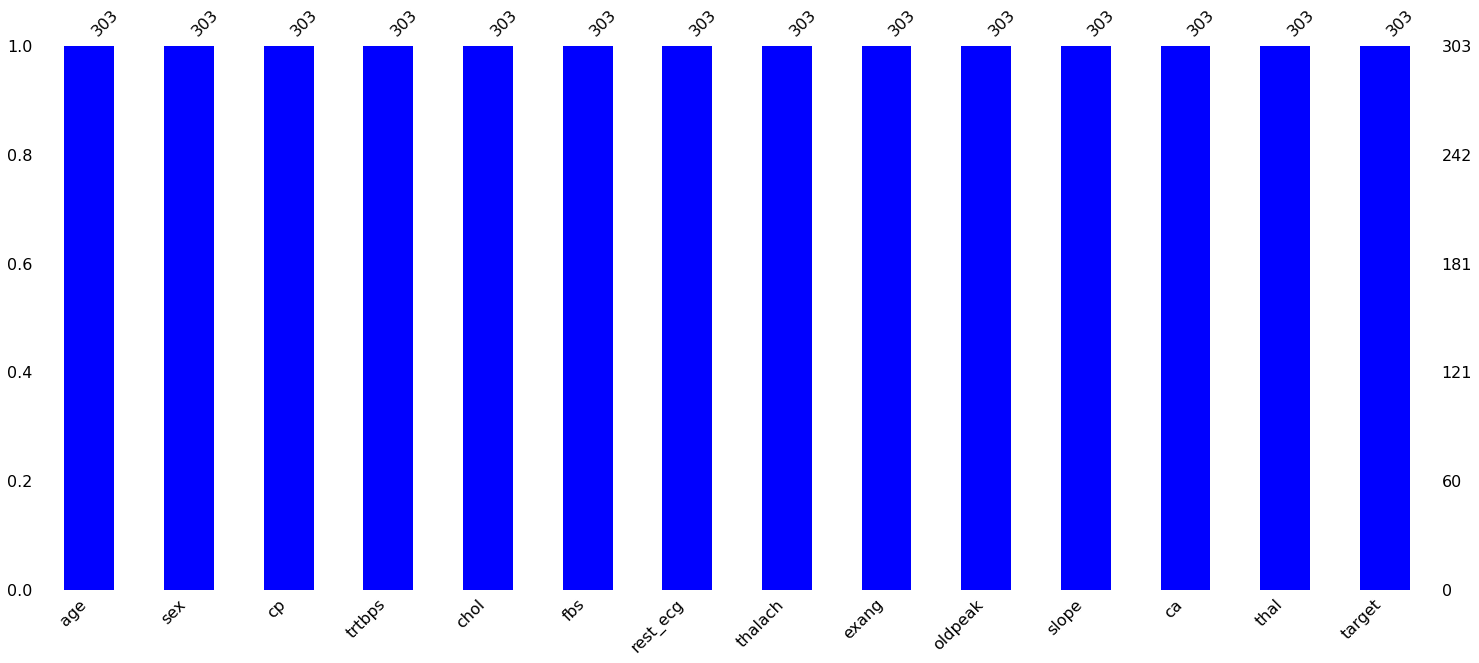

In [12]:
import missingno
missingno.bar(df, color="b")

#### 3.4 Unique Value Analysis <a id=8></a>
Done to help understand which columns contain numeric values and categorical values.

In [13]:
unique_values = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_values.append(x)
    
pd.DataFrame(unique_values, index=df.columns, columns=["Total Unique Values"])

,Total Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


#### The analysis shows that there are two groups of data: numeric and categorical.
The categorical values (a.k.a. qualitative data) are the ones with low Total Unique Values, these include: sex, cp, fbs rest_ecg, exang, etc. The numeric values include the ones with high Total Unique Values such as chol, trtbps, etc.

In [14]:
numeric_vars = ["age", "trtbps", "chol", "thalach", "oldpeak"]
categorical_vars = ["sex", "cp", "fbs", "rest_ecg", "exang",  "slope", "ca", "thal", "target"]

#### 3.5 Examining Variable Statistics <a id=9></a>

In [15]:
df[numeric_vars].describe()

,age,trtbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


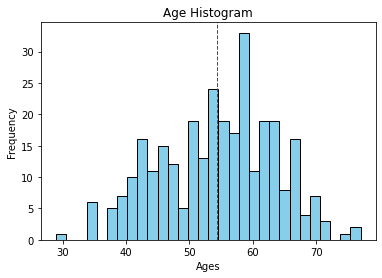

In [16]:
plt.hist(df["age"], bins=30, color='skyblue', edgecolor='black')
plt.axvline(df["age"].mean(), color='r', linestyle='dashed', linewidth=1) 
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Age Histogram')
 
# Display the plot
plt.show()

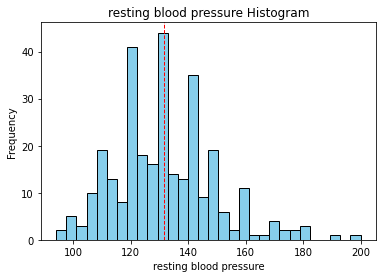

In [17]:
plt.hist(df["trtbps"], bins=30, color='skyblue', edgecolor='black')
plt.axvline(df["trtbps"].mean(), color='r', linestyle='dashed', linewidth=1) 
plt.xlabel('resting blood pressure')
plt.ylabel('Frequency')
plt.title('resting blood pressure Histogram')
 
# Display the plot
plt.show()

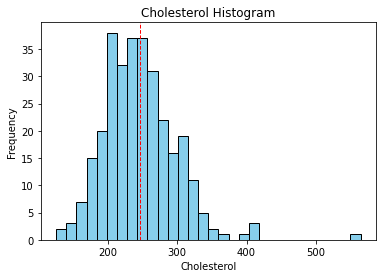

In [18]:
plt.hist(df["chol"], bins=30, color='skyblue', edgecolor='black')
plt.axvline(df["chol"].mean(), color='r', linestyle='dashed', linewidth=1)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Cholesterol Histogram')
 
# Display the plot
plt.show()

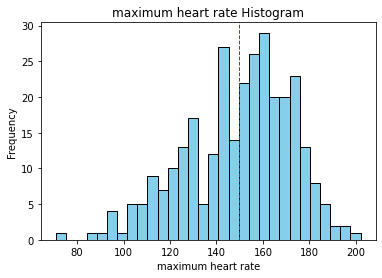

In [19]:
plt.hist(df["thalach"], bins=30, color='skyblue', edgecolor='black')
plt.axvline(df["thalach"].mean(), color='r', linestyle='dashed', linewidth=1)
plt.xlabel('maximum heart rate')
plt.ylabel('Frequency')
plt.title('maximum heart rate Histogram')
 
# Display the plot
plt.show()

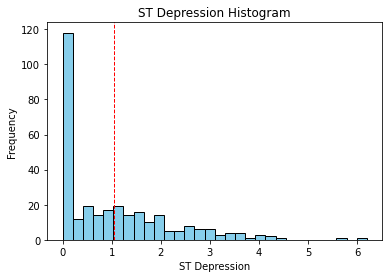

In [20]:
plt.hist(df["oldpeak"], bins=30, color='skyblue', edgecolor='black')
plt.axvline(df["oldpeak"].mean(), color='r', linestyle='dashed', linewidth=1)
plt.xlabel('ST Depression')
plt.ylabel('Frequency')
plt.title('ST Depression Histogram')
 
# Display the plot
plt.show()

#### 3.6 Exploratory Data Analysis of Numeric Data <a id=10></a>

In [21]:
numeric_vars

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [22]:
numeric_axis_names = ['Subject Age', 'Resting Blood Pressure', 'Cholesterol', 'Max Heart Rate Achieved', 'ST Depression']
list(zip(numeric_vars,numeric_axis_names))


[('age', 'Subject Age'),
 ('trtbps', 'Resting Blood Pressure'),
 ('chol', 'Cholesterol'),
 ('thalach', 'Max Heart Rate Achieved'),
 ('oldpeak', 'ST Depression')]

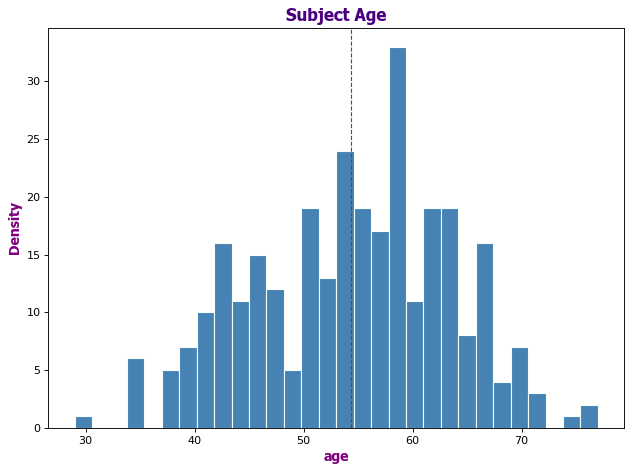

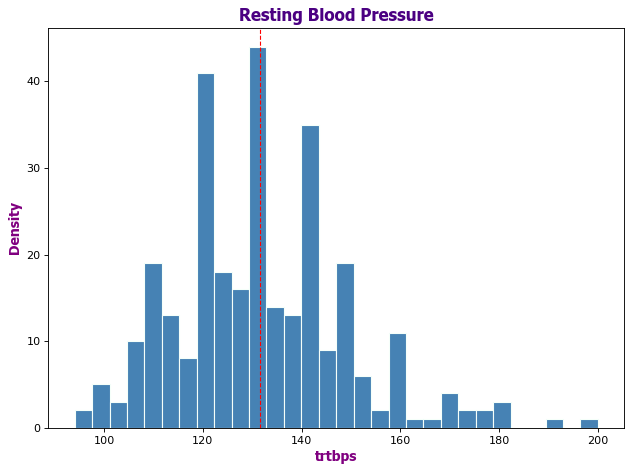

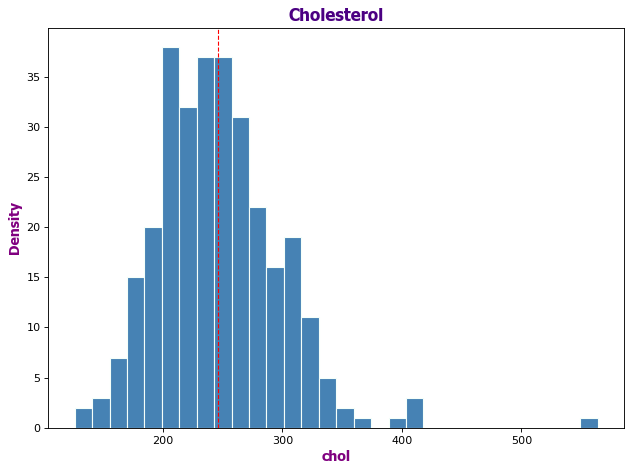

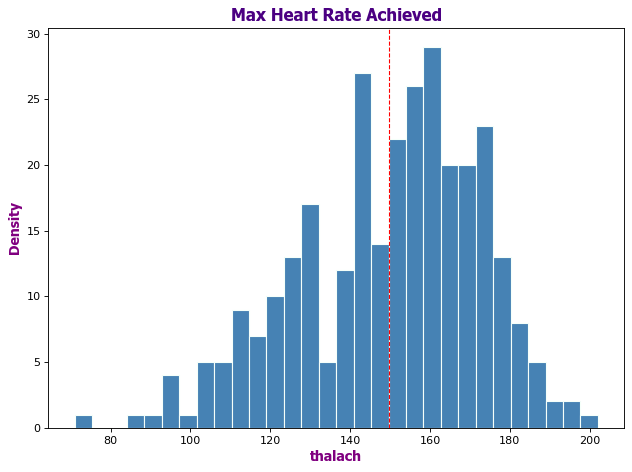

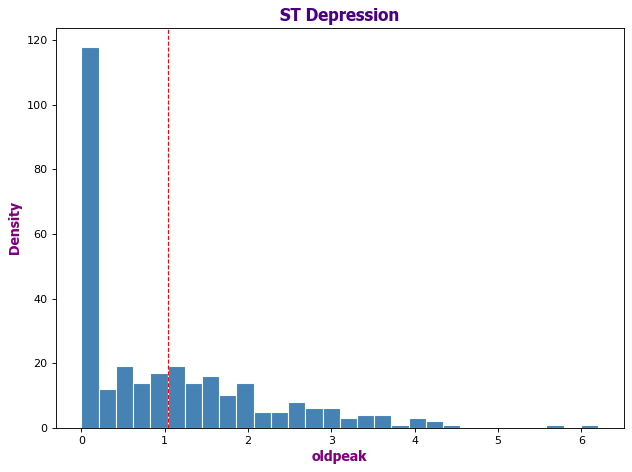

In [23]:
title_font = {'family':'tahoma','color':'indigo','weight':'bold','size':'15'}
axis_font = {'family':'tahoma','color':'purple','weight':'bold','size':'12.5'}

for i, z in list(zip(numeric_vars, numeric_axis_names)):
    plt.figure(figsize=(8,6), dpi=80)
    plt.hist(df[i], bins=30, color='steelblue', edgecolor='mintcream')
    plt.axvline(df[i].mean(), color='r', linestyle='dashed', linewidth=1)
    plt.title(z, fontdict=title_font)
    plt.xlabel(i, fontdict=axis_font)
    plt.ylabel("Density", fontdict=axis_font)
    plt.tight_layout()
    plt.show()
    

#### 3.7 Categorical Variable Analysis w/ Pie Chart <a id=11></a>

In [24]:
categorical_vars

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [25]:
categorical_axis_names = ['Gender', 'Chest Pain Type', 'Fasting Blood Sugar', 'Resting Electrocardiographic Results', 'Exercise Induced Angina', 'The Slope of ST Segment', 'Number of Major Vessels', 'Thal', 'Target']



In [26]:
list(zip(categorical_vars,categorical_axis_names))


[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('fbs', 'Fasting Blood Sugar'),
 ('rest_ecg', 'Resting Electrocardiographic Results'),
 ('exang', 'Exercise Induced Angina'),
 ('slope', 'The Slope of ST Segment'),
 ('ca', 'Number of Major Vessels'),
 ('thal', 'Thal'),
 ('target', 'Target')]

In [27]:
list(df['cp'].value_counts())

[143, 87, 50, 23]

In [28]:
list(df['cp'].value_counts().index)

[0, 2, 1, 3]

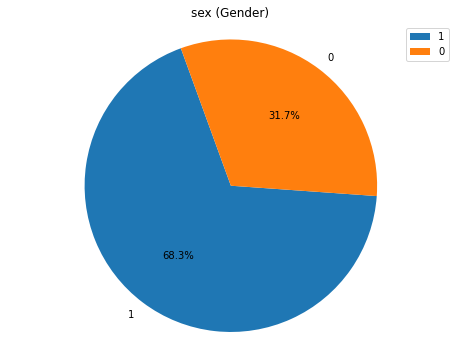

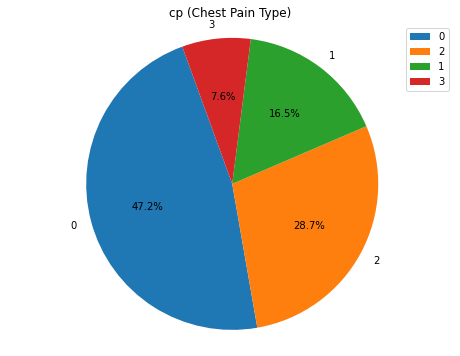

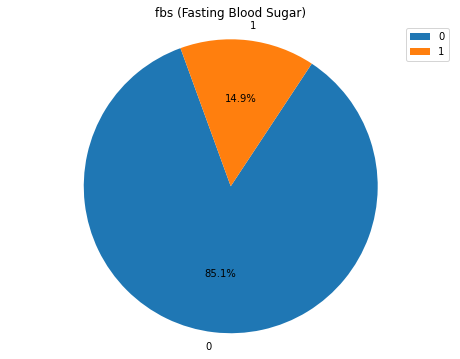

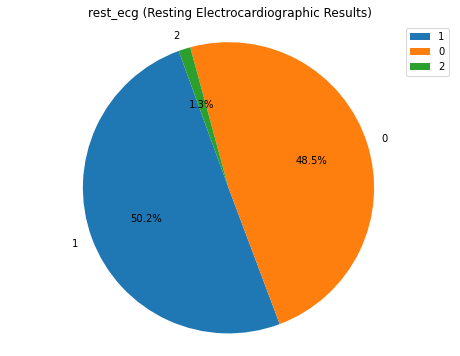

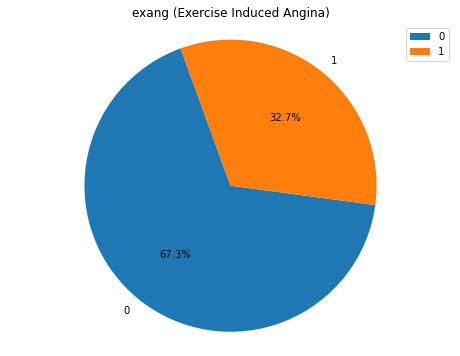

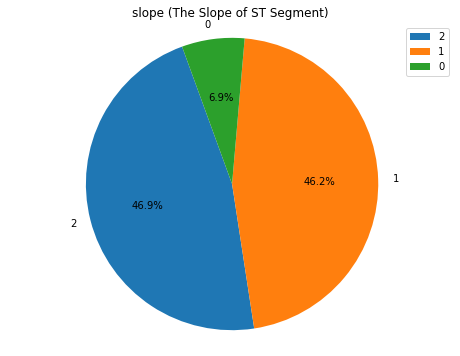

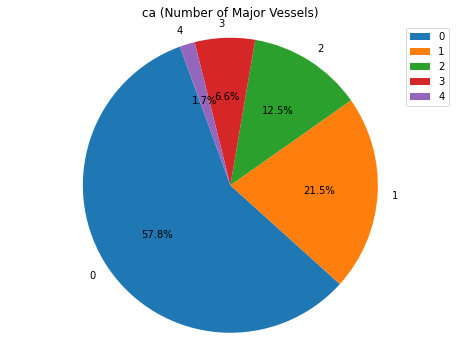

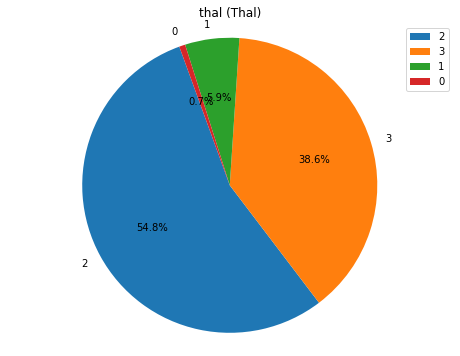

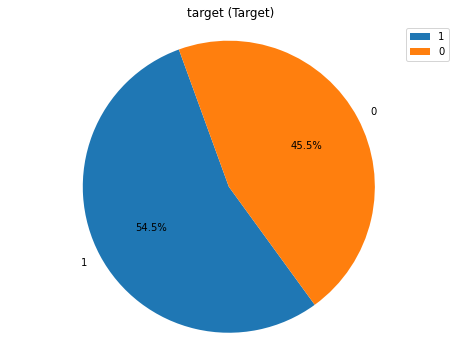

In [29]:
title_font = {'family':'tahoma','color':'indigo','weight':'bold','size':'15'}
axis_font = {'family':'tahoma','color':'purple','weight':'bold','size':'12.5'}

for i, z in list(zip(categorical_vars,categorical_axis_names)):
    fig, ax = plt.subplots(figsize=(8,6))
    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())
    ax.pie(total_observation_values, labels=observation_values, autopct='%1.1f%%', startangle=110, labeldistance=1.1)
    ax.axis('equal')
    
    plt.title(i + " (" + z + ")")
    plt.legend()
    plt.show()

#### NOTE: In the 'Thal" column, there is at least one value of zero ('0'), which was missed in the initial analysis. Zero is not an option for this category. Instead of deleting any rows with a zero, replace with the most frequent categorical variable, which is 2.

#### Missing Data Analysis <a id=12></a>

In [30]:
#Create a dataframe that contains any rows with a zero in the thal column
df[df['thal'] == 0]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [31]:
df['thal'] = df['thal'].replace(0, np.nan)

In [32]:
df.loc[[48, 281], :]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,NaN,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,NaN,0


#### The rows with zeros were replaced with NaN.

In [33]:
isnull_number = []

for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index=df.columns, columns=['Total Missing Values'])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


In [34]:
#replace any row with NaN with 2, which is the most frequent categorical variable.
df['thal'].fillna(2, inplace=True)
df.loc[[48,281], : ]

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2.0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2.0,0


#### As can be seen, the thal column was converted to float. It needs to be converted back to integer.

In [35]:
df.head()


,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1.0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2.0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2.0,1


In [36]:
#convert thal column back to integer
df['thal'] = pd.to_numeric(df['thal'], downcast="integer")

In [37]:
df.head()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
df['thal'].value_counts()

thal
2    168
3    117
1     18
Name: count, dtype: int64

In [39]:
isnull_number = []

for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index=df.columns, columns=['Total Missing Values'])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


#### 3.9 Bi-variate Analysis <a id=13></a>

#### 3.9.1 Bi-variate Analysis of Numerical Data <a id=14></a>

In [40]:
numeric_vars

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

In [41]:
#add target variable to list
numeric_vars.append('target')
numeric_vars

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

In [42]:
df[numeric_vars].corr()

,age,trtbps,chol,thalach,oldpeak,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


In [43]:
#look at correlation of variables with on only the target variable
df[numeric_vars].corr().iloc[:,[-1]]

,target
age,-0.225439
trtbps,-0.144931
chol,-0.085239
thalach,0.421741
oldpeak,-0.430696
target,1.000000


#### There appears to be no strong correlation (i.e. low correlation) with any of the variables and the target variable.

#### 3.9.2 Bi-variate Analysis of Categorical Data <a id=15></a>

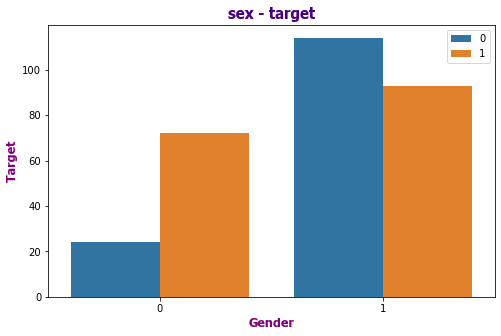

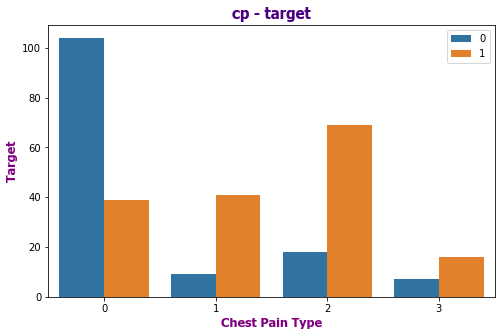

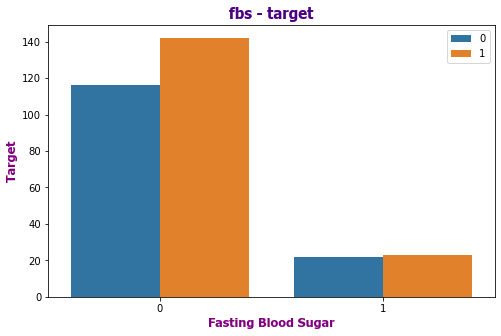

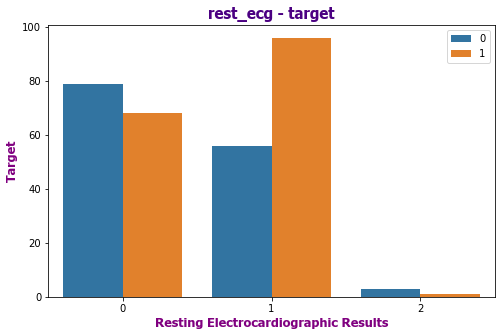

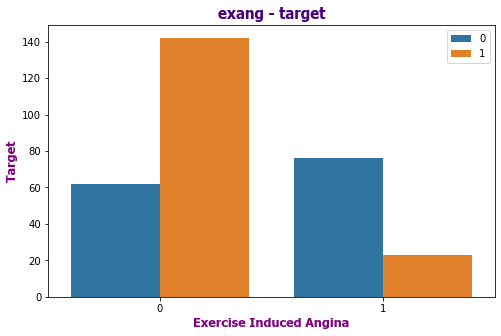

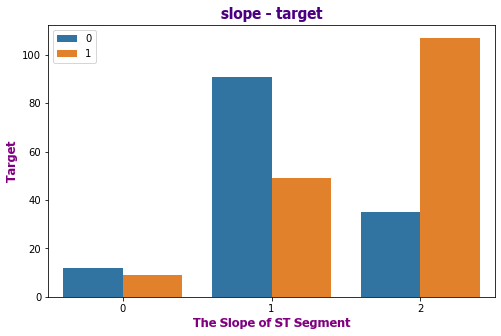

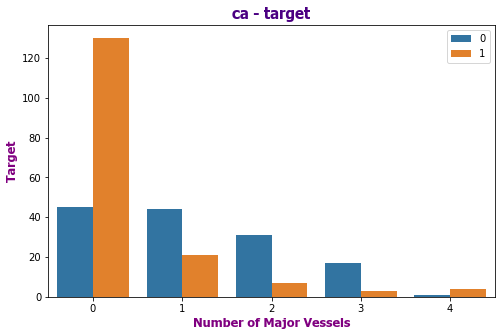

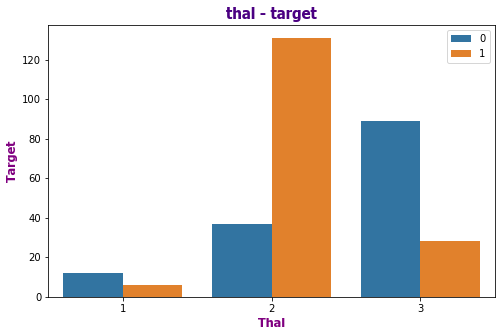

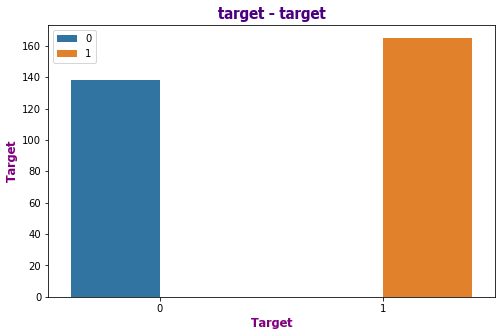

In [44]:
title_font = {'family':'tahoma','color':'indigo','weight':'bold','size':'15'}
axis_font = {'family':'tahoma','color':'purple','weight':'bold','size':'12.5'}

for i, z in list(zip(categorical_vars,categorical_axis_names)):
    plt.figure(figsize=(8,5))
    sns.countplot(i, data=df[categorical_vars], hue="target")
    plt.xlabel(z, fontdict=axis_font)
    plt.ylabel("Target", fontdict=axis_font)
    plt.title(i + ' - target', fontdict=title_font)
    plt.legend()
    plt.show()

### NOTE: Above, the color blue (0) indicates no risk of heart attack. Orange (1) indicates a risk of heart attack. Females, therefore, appear to have more of a risk of a heart attack than men. Those that do not have any pain, the risk of heart attack is low but having a pain means there is a higher probability to have a heart attack. Also, if a patient has a resting electrocardiographic result of 1, which is abnormal, the chance of a heart attack is almost double. 
### Furthermore, subjects that have chest pain NOT related to exercise appear to have nearly three-times the risk of a heart attack and those with chest pain (angina) that is related to exercises have a much higher chance of NOT having a heart attack, that is exercise related chest pain does not have much of a chance of a heart attack. 
### In addition for ca, if number of major vessels colored by flourosopy is 0, the risk of a heart attack is very high.

In [45]:
df[categorical_vars].corr()

,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
sex,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
rest_ecg,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exang,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757
slope,-0.030711,0.119717,-0.059894,0.093045,-0.257748,1.000000,-0.080155,-0.106310,0.345877
ca,0.118261,-0.181053,0.137979,-0.072042,0.115739,-0.080155,1.000000,0.143248,-0.391724
thal,0.211652,-0.169125,-0.011209,-0.013795,0.225508,-0.106310,0.143248,1.000000,-0.363322
target,-0.280937,0.433798,-0.028046,0.137230,-0.436757,0.345877,-0.391724,-0.363322,1.000000


In [46]:
#have output in the form of a dataframe, so put column in brackets
df[categorical_vars].corr().iloc[:, [-1]]


,target
sex,-0.280937
cp,0.433798
fbs,-0.028046
rest_ecg,0.137230
exang,-0.436757
slope,0.345877
ca,-0.391724
thal,-0.363322
target,1.000000


#### There appears to be only moderate to very low correlations.

#### 3.10 Pair Plot Analysis of Numerical Data <a id=16></a>

In [47]:
numeric_vars

['age', 'trtbps', 'chol', 'thalach', 'oldpeak', 'target']

In [48]:
#examine relationship among variables minus target variable
numeric_vars.remove('target')
numeric_vars

['age', 'trtbps', 'chol', 'thalach', 'oldpeak']

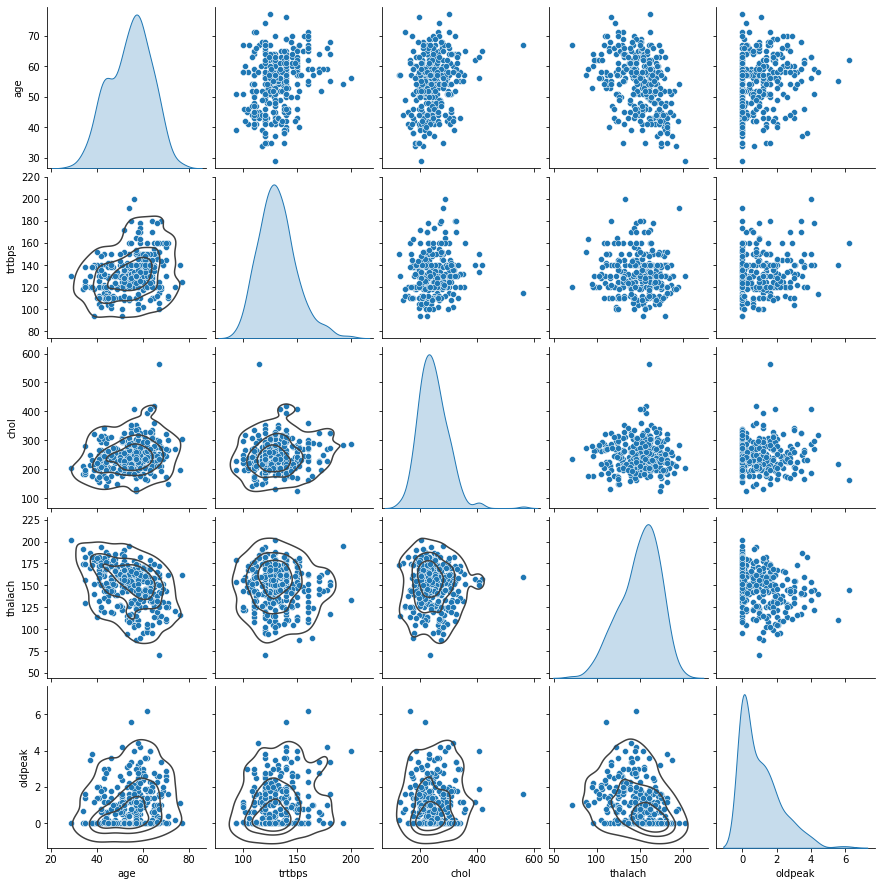

In [49]:
graph = sns.pairplot(df[numeric_vars], diag_kind='kde')
graph.map_lower(sns.kdeplot, levels=4, color=".25")
plt.show()

#### 3.11 RobustScaler to Nullify Outlier Influence <a id=17></a>

In [50]:
from sklearn.preprocessing import RobustScaler

In [51]:
robust_scaler = RobustScaler()

In [52]:
scaled_data = robust_scaler.fit_transform(df[numeric_vars])

In [53]:
scaled_data

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]])

In [54]:
type(scaled_data)

numpy.ndarray

In [55]:
#convert to dataframe
df_scaled = pd.DataFrame(scaled_data, columns=numeric_vars)
type(df_scaled)

pandas.core.frame.DataFrame

In [56]:
df_scaled.head()

,age,trtbps,chol,thalach,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250


#### 3.12 Melt Function w/ Scaled Data <a id=18></a>

In [57]:
#create new df to combine scaled data with the target value
df_temp = pd.concat([df_scaled, df.loc[:, "target"]], axis=1)

In [58]:
df_temp.head()

,age,trtbps,chol,thalach,oldpeak,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1


In [59]:
melted_data = pd.melt(df_temp, id_vars="target", var_name="variables", value_name="value")

In [60]:
melted_data


,target,variables,value
0,1,age,0.592593
1,1,age,-1.333333
2,1,age,-1.037037
3,1,age,0.074074
4,1,age,0.148148
...,...,...,...
1510,0,oldpeak,-0.375000
1511,0,oldpeak,0.250000
1512,0,oldpeak,1.625000
1513,0,oldpeak,0.250000


#### 3.13 Swarm Plot Analysis of Numerical Data <a id=19></a>

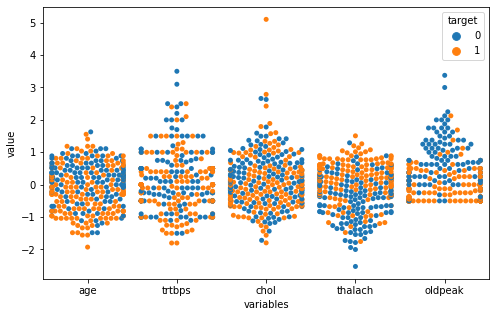

In [61]:
plt.figure(figsize=(8,5))
sns.swarmplot(x='variables', y='value', hue='target', data=melted_data)
plt.show()

#### 3.14 Heat Map of All Variables <a id=20></a>

In [62]:
#concatenate the two dataframes
df_concat = pd.concat([df_scaled, df[categorical_vars]], axis=1)

In [63]:
df_concat

,age,trtbps,chol,thalach,oldpeak,sex,cp,fbs,rest_ecg,exang,slope,ca,thal,target
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,3,1,0,0,0,0,1,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,2,0,1,0,0,0,2,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,1,0,0,0,2,0,2,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,1,0,1,0,2,0,2,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750,0,0,0,1,1,1,0,3,0
299,-0.740741,-1.00,0.377953,-0.646154,0.2500,1,3,0,1,0,1,0,3,0
300,0.962963,0.70,-0.740157,-0.369231,1.6250,1,0,1,1,0,1,2,3,0
301,0.148148,0.00,-1.716535,-1.169231,0.2500,1,0,0,1,1,1,1,3,0


<AxesSubplot:>

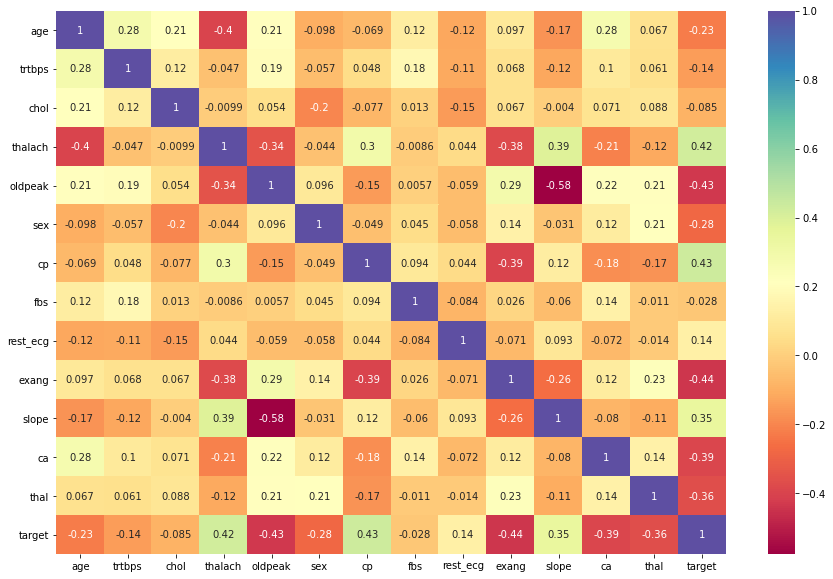

In [64]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df_concat.corr(), cmap='Spectral', annot=True)

### 4. Machine Learning Model Preparation <a id=21></a>

Drop columns with low correlation.

In [65]:
df.drop(['chol', 'fbs', 'rest_ecg'], axis=1, inplace=True)
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,150,0,2.3,0,0,1,1
1,37,1,2,130,187,0,3.5,0,0,2,1
2,41,0,1,130,172,0,1.4,2,0,2,1
3,56,1,1,120,178,0,0.8,2,0,2,1
4,57,0,0,120,163,1,0.6,2,0,2,1


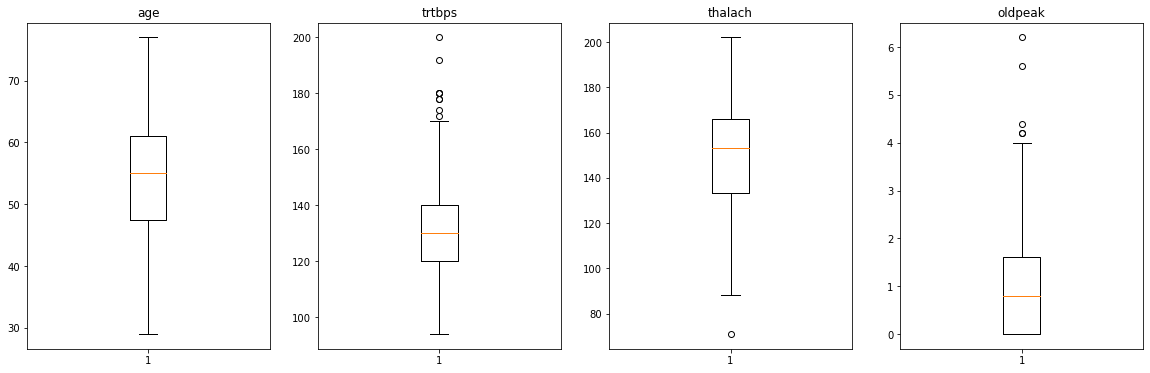

In [66]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,6))
ax1.boxplot(df['age'])
ax1.set_title('age')

ax2.boxplot(df['trtbps'])
ax2.set_title('trtbps')

ax3.boxplot(df['thalach'])
ax3.set_title('thalach')

ax4.boxplot(df['oldpeak'])
ax4.set_title('oldpeak')
plt.show()

#### 4.1 Outlier Procedures <a id=22></a>

In [67]:
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

In [68]:
z_scores_trtbps = zscore(df['trtbps'])
for threshold in range(1,4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_scores_trtbps > threshold)[0])))
    print("----------------------------")      

Threshold Value: 1
Number of Outliers: 51
----------------------------
Threshold Value: 2
Number of Outliers: 13
----------------------------
Threshold Value: 3
Number of Outliers: 2
----------------------------


In [69]:
#Show outliers for trtbps
df[z_scores_trtbps > 2][['trtbps']]

,trtbps
8,172
101,178
110,180
152,170
195,170
203,180
223,200
228,170
241,174
248,192


In [70]:
#Show minimum outlier for trtbps
df[z_scores_trtbps > 2].trtbps.min()

170

In [71]:
#Highest value not including outliers
df[df['trtbps']<170].trtbps.max()

165

In [72]:
#accept 165 as the highest value and limit the outliers values via Winsorize technique
winsorize_percentile_trtbps = (stats.percentileofscore(df['trtbps'], 165)) / 100


In [73]:
print(winsorize_percentile_trtbps)

0.957095709570957


In [74]:
1 - winsorize_percentile_trtbps

0.04290429042904298

In [75]:
trtbps_winsorize = winsorize(df.trtbps, (0, (1 - winsorize_percentile_trtbps)))

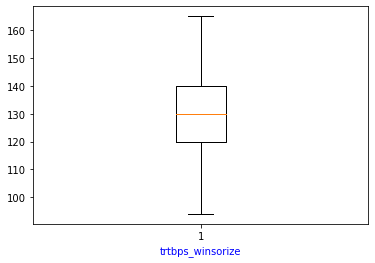

In [76]:
#show that outliers have been changed
plt.boxplot(trtbps_winsorize)
plt.xlabel('trtbps_winsorize', color = 'b')
plt.show()

In [77]:
#create new column with winsorized variables
df['trtbps_winsorize'] = trtbps_winsorize
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145
1,37,1,2,130,187,0,3.5,0,0,2,1,130
2,41,0,1,130,172,0,1.4,2,0,2,1,130
3,56,1,1,120,178,0,0.8,2,0,2,1,120
4,57,0,0,120,163,1,0.6,2,0,2,1,120


#### 4.1.1 Function to Detect Outliers <a id=23></a>

In [78]:
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]

#### 4.2 Removing Thalach Outliers <a id=24></a>

In [79]:
thalach_result = iqr(df, 'thalach')

In [80]:
thalach_result

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
272,67,1,0,120,71,0,1.0,1,0,2,0,120


In [81]:
#Remove this outlier since it is only one row
df.drop([272], axis=0, inplace=True)
df['thalach'][270:275]

270    144
271    145
273    156
274    118
275    168
Name: thalach, dtype: int64

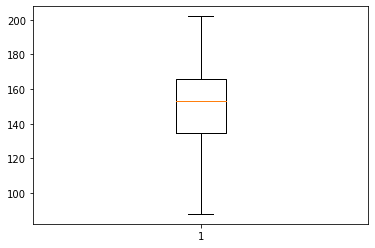

In [82]:
plt.boxplot(df['thalach']);

In [83]:
iqr(df, 'oldpeak')

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize
101,59,1,3,178,145,0,4.2,0,0,3,1,165
204,62,0,0,160,145,0,6.2,0,3,3,0,160
221,55,1,0,140,111,1,5.6,0,0,3,0,140
250,51,1,0,140,122,1,4.2,1,3,3,0,140
291,58,1,0,114,140,0,4.4,0,3,1,0,114


Winsorize oldpeak value since there are more than one row and the dataset is small.

In [84]:
df[df['oldpeak'] < 4.2].oldpeak.max()

4.0

In [85]:
winsorize_percentile_oldpeak = (stats.percentileofscore(df['oldpeak'], 4)) / 100
print(winsorize_percentile_oldpeak)

0.9801324503311258


In [86]:
oldpeak_winsorize = winsorize(df.oldpeak, (0, 1 - winsorize_percentile_oldpeak))

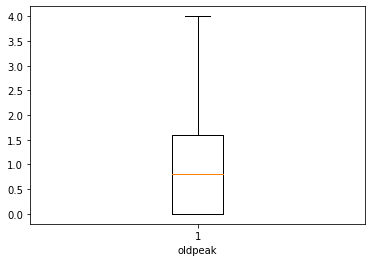

In [87]:
plt.boxplot(oldpeak_winsorize)
plt.xlabel('oldpeak')
plt.show()

In [88]:
#Add this column to the dataframe
df['oldpeak_winsorize'] = oldpeak_winsorize

In [89]:
df.head()

,age,sex,cp,trtbps,thalach,exang,oldpeak,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,145,150,0,2.3,0,0,1,1,145,2.3
1,37,1,2,130,187,0,3.5,0,0,2,1,130,3.5
2,41,0,1,130,172,0,1.4,2,0,2,1,130,1.4
3,56,1,1,120,178,0,0.8,2,0,2,1,120,0.8
4,57,0,0,120,163,1,0.6,2,0,2,1,120,0.6


Now drop the data with ouliers.

In [90]:
df.drop(['trtbps', 'oldpeak'], axis=1, inplace=True)

In [91]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,150,0,0,0,1,1,145,2.3
1,37,1,2,187,0,0,0,2,1,130,3.5
2,41,0,1,172,0,2,0,2,1,130,1.4
3,56,1,1,178,0,2,0,2,1,120,0.8
4,57,0,0,163,1,2,0,2,1,120,0.6


#### 4.3 Numeric Variable Distributions <a id=25></a>

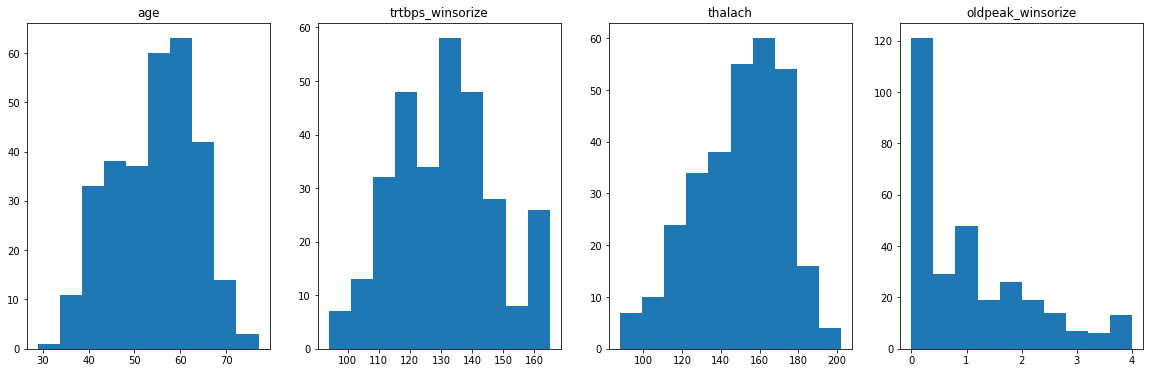

In [92]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,6))
ax1.hist(df['age'])
ax1.set_title('age')

ax2.hist(df['trtbps_winsorize'])
ax2.set_title('trtbps_winsorize')

ax3.hist(df['thalach'])
ax3.set_title('thalach')

ax4.hist(df['oldpeak_winsorize'])
ax4.set_title('oldpeak_winsorize')
plt.show()

#### 4.4 Skew Distribution Analysis <a id=26></a>

In [93]:
df[["age", "trtbps_winsorize", "thalach", "oldpeak_winsorize"]].agg(["skew"]).transpose()

,skew
age,-0.199209
trtbps_winsorize,0.251969
thalach,-0.461611
oldpeak_winsorize,0.996036


The oldpeak_winsorize is heavily skewed and thus needs to be shaped into more of a normal distribution as the others are. Thus transforming unsymmetrical data will be done.

#### 4.5 Unsymmetrical Data Transformation <a id=27></a>

In [94]:
df['oldpeak_winsorize_log'] = np.log(df["oldpeak_winsorize"])
df['oldpeak_winsorize_sqrt'] = np.sqrt(df["oldpeak_winsorize"])

In [95]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize,oldpeak_winsorize_log,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,2.3,0.832909,1.516575
1,37,1,2,187,0,0,0,2,1,130,3.5,1.252763,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.4,0.336472,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.8,-0.223144,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.6,-0.510826,0.774597


In [96]:
df[["oldpeak_winsorize_log", "trtbps_winsorize", "oldpeak_winsorize_sqrt", "oldpeak_winsorize"]].agg(["skew"]).transpose()

,skew
oldpeak_winsorize_log,NaN
trtbps_winsorize,0.251969
oldpeak_winsorize_sqrt,0.108926
oldpeak_winsorize,0.996036


In [97]:
df.drop(["oldpeak_winsorize", "oldpeak_winsorize_log"], axis=1, inplace=True)

In [98]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597


#### 4.6 One Hot Encoding Method for Categorical Data <a id=28></a>

In [99]:
df_copy = df.copy()

In [100]:
df_copy.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597


In [101]:
categorical_vars

['sex', 'cp', 'fbs', 'rest_ecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [102]:
categorical_vars.remove("fbs")
categorical_vars.remove("rest_ecg")

In [103]:
categorical_vars

['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']

In [104]:
df_copy = pd.get_dummies(df_copy, columns=categorical_vars[:-1], drop_first=True, dtype=int)

In [105]:
df_copy.head()

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,63,150,1,145,1.516575,1,0,0,1,0,0,0,0,0,0,0,0,0
1,37,187,1,130,1.870829,1,0,1,0,0,0,0,0,0,0,0,1,0
2,41,172,1,130,1.183216,0,1,0,0,0,0,1,0,0,0,0,1,0
3,56,178,1,120,0.894427,1,1,0,0,0,0,1,0,0,0,0,1,0
4,57,163,1,120,0.774597,0,0,0,0,1,0,1,0,0,0,0,1,0


#### 4.7 Scale Numeric Data <a id=29></a>

In [106]:
df.head()

,age,sex,cp,thalach,exang,slope,ca,thal,target,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1,1,145,1.516575
1,37,1,2,187,0,0,0,2,1,130,1.870829
2,41,0,1,172,0,2,0,2,1,130,1.183216
3,56,1,1,178,0,2,0,2,1,120,0.894427
4,57,0,0,163,1,2,0,2,1,120,0.774597


In [107]:
scale_numeric_data = ["age", "thalach", "trtbps_winsorize", "oldpeak_winsorize_sqrt"]

In [108]:
#create sclaer object
robust_scaler = RobustScaler()

In [109]:
df_copy[scale_numeric_data] = robust_scaler.fit_transform(df_copy[scale_numeric_data])

In [110]:
df_copy.head()

,age,thalach,target,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
0,0.581818,-0.095238,1,0.75,0.491851,1,0,0,1,0,0,0,0,0,0,0,0,0
1,-1.309091,1.079365,1,0.00,0.771913,1,0,1,0,0,0,0,0,0,0,0,1,0
2,-1.018182,0.603175,1,0.00,0.228308,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0.072727,0.793651,1,-0.50,0.000000,1,1,0,0,0,0,1,0,0,0,0,1,0
4,0.145455,0.317460,1,-0.50,-0.094734,0,0,0,0,1,0,1,0,0,0,0,1,0


### 5. Machine Learning Models <a id=30></a>

#### 5.1 Test and Training Data <a id=31></a>

In [111]:
from sklearn.model_selection import train_test_split

In [114]:
#remove the target variable from the dataset but set the target variable to y. train size set to 10%. The random state is used 
#to control the shuffling applied to the data before applying the split.
X = df_copy.drop(['target'], axis=1)
y = df_copy[['target']]

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

In [116]:
X_train.head()

,age,thalach,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_2,thal_3
201,0.363636,-0.380952,-0.25,0.615769,1,0,0,0,1,1,0,1,0,0,0,0,1
82,0.363636,0.222222,-1.40,-0.707107,0,0,1,0,0,0,1,1,0,0,0,1,0
187,-0.072727,-1.396825,-0.30,0.465497,1,0,0,0,1,1,0,1,0,0,0,0,1
259,-1.236364,0.920635,-0.50,0.833997,1,0,0,1,1,1,0,0,0,0,0,0,1
5,0.145455,-0.158730,0.50,-0.207107,1,0,0,0,0,1,0,0,0,0,0,0,0


In [117]:
y_train.head()

,target
201,0
82,1
187,0
259,0
5,1


In [126]:
#show number of rows
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 271
X_test: 31
y_train: 271
y_test: 31


#### 5.2 Logistic Regression Model <a id=32></a>

Utilizing logistic regression to learn if certain factors (i.e. variables) can be used to predict a binary outcome, in this case whether or not a heart attack is likely to occur or not occur.

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [129]:
#create a logistic regression object
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [130]:
#train the model with the trainig dataset
log_reg.fit(X_train, y_train)

LogisticRegression()

In [133]:
#generate predictions
y_pred = log_reg.predict(X_test)

In [134]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1])

In [135]:
#test the accuracy of these predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Test: {}".format(accuracy))

Accuracy Test: 0.8709677419354839


The accuracy of this logistic model is approximately: 87.09%.

#### 5.3 Test Reliability of Model with Cross Validation <a id=33></a>

In [137]:
from sklearn.model_selection import cross_val_score

In [138]:
#run the model on data it has not seen before and get average. Run it 10 times
scores = cross_val_score(log_reg, X_test, y_test, cv=10)
print("Cross Validation Accuracy Results", scores.mean())

Cross Validation Accuracy Results 0.8666666666666666


The Cross Validation Accuracy Results show that the model did not memorize the data and there was no overfitting.

#### 5.4 Measure Model Performance with ROC Curve and AUC <a id=34></a>

In [139]:
from sklearn.metrics import plot_roc_curve

ROC is a probability curve, the higher the model is above the dashed line the better. The closer to the dashed line, the lower the performance. Models under the dashed line should not be used. The higher the AUC (area under the curve), the better the model.

<img src="auc.png" style="" align="left" width="300" height="320"/>

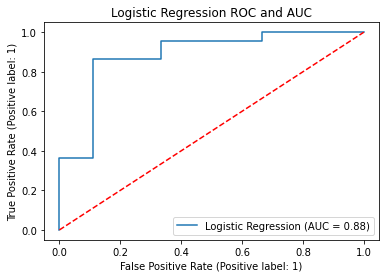

In [141]:
plot_roc_curve(log_reg, X_test, y_test, name="Logistic Regression")
plt.title("Logistic Regression ROC Curve and AUC")
plt.plot([0,1], [0,1], "r--")
plt.show()

The AUC value is 0.88, which is very good. Also the ROC Curve (receiver operating characteristic) is well above the red line and that is another indication that the model is acceptable.

#### 5.5  Hyperparameter Optimization Fine Tuning <a id=35></a>

Use hyperparameter optimization to fine-tune and find a tuple of hyperparameters that yields an optimal model to minimize a predefined loss function on a given independent data. 

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
#really only should be used with small datasets
#create a new logistic regression object
log_reg_new = LogisticRegression()
log_reg_new

LogisticRegression()

In [148]:
parameters = {'penalty':["l1", "l2"], "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [149]:
log_reg_grid = GridSearchCV(log_reg_new, param_grid=parameters)

In [150]:
log_reg_grid.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [151]:
print("The Best Parameters to Use: ", log_reg_grid.best_params_)

The Best Parameters to Use:  {'penalty': 'l1', 'solver': 'saga'}


In [152]:
#create new object with chosen parameters
log_reg_new2 = LogisticRegression(penalty = 'l1', solver='saga')
log_reg_new2

LogisticRegression(penalty='l1', solver='saga')

In [153]:
log_reg_new2.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='saga')

In [154]:
#create prediction variable
y_pred = log_reg_new2.predict(X_test)

In [159]:
print("The accuracy score of the model after Hyperparameter Optimization Fine Tuning: {}"\
      .format(accuracy_score(y_test, y_pred)))

The accuracy score of the model after Hyperparameter Optimization Fine Tuning: 0.8709677419354839


The Accuracy Test from above was 0.8709677419354839 and the Accuracy Test after Hyperparameter Optimization Fine Tuning was 0.8709677419354839, which is exactly the same so the parameters were set optimally. And the ROC  Curve and AUC results confirm that.

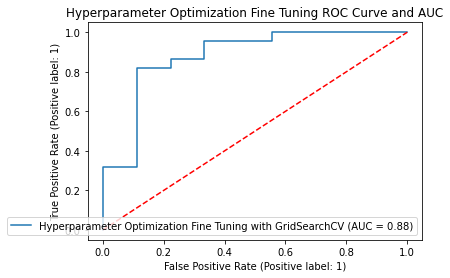

In [160]:
plot_roc_curve(log_reg_new2, X_test, y_test, name="Hyperparameter Optimization Fine Tuning with GridSearchCV")
plt.title("Hyperparameter Optimization Fine Tuning ROC Curve and AUC")
plt.plot([0,1], [0,1], "r--")
plt.show()

#### 5.6 Decisin Tree Model <a id=36></a>

Use a decision tree model to learn if better results can be obtained.

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
dec_tree = DecisionTreeClassifier(random_state = 5)

In [164]:
dec_tree

DecisionTreeClassifier(random_state=5)

In [165]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [166]:
y_pred = dec_tree.predict(X_test)

In [167]:
print("Decision Tree Accuracy Results: ", accuracy_score(y_test, y_pred))

Decision Tree Accuracy Results:  0.8387096774193549


In [168]:
scores = cross_val_score(dec_tree, X_test, y_test, cv=10)
print("Decision Tree Accuracy Results", scores.mean())

Decision Tree Accuracy Results 0.8333333333333333


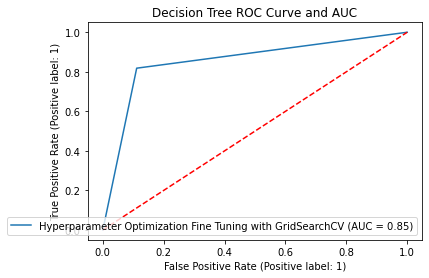

In [169]:
plot_roc_curve(dec_tree, X_test, y_test, name="Hyperparameter Optimization Fine Tuning with GridSearchCV")
plt.title("Decision Tree ROC Curve and AUC")
plt.plot([0,1], [0,1], "r--")
plt.show()

The results for the decision tree model are below that of the logistic regression model and should not be used as the other model should produce more accurate results.

#### 5.7 Support Vector Machine Algorithm<a id=37></a>

In [170]:
from sklearn.svm import SVC

In [171]:
#create object model
svc_model = SVC(random_state=5)

In [173]:
#train the model
svc_model.fit(X_train, y_train)

SVC(random_state=5)

In [174]:
y_pred = svc_model.predict(X_test)

In [175]:
print("The Support Vector Machine Algorithm Accuracy is: ", accuracy_score(y_test, y_pred))

The Support Vector Machine Algorithm Accuracy is:  0.8709677419354839


In [177]:
#how reliable is the above result
scores = cross_val_score(svc_model, X_test, y_test, cv=10)
print("Support Vector Machine Algorithm Results", scores.mean())

Support Vector Machine Algorithm Results 0.8333333333333334


There is an overfitting issue. The model performance is approximately 83.33%. However, the AUC value is .89, which is better than the other models as shown below. But the model performance is better with the logistic regression.

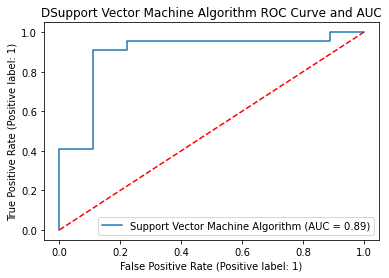

In [178]:
plot_roc_curve(svc_model, X_test, y_test, name="Support Vector Machine Algorithm")
plt.title("DSupport Vector Machine Algorithm ROC Curve and AUC")
plt.plot([0,1], [0,1], "r--")
plt.show()

#### 5.8 Random Forest Algorithm<a id=38></a>

In [188]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
ran_forest = RandomForestClassifier(random_state=5)

In [190]:
ran_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=5)

In [191]:
y_pred = ran_forest.predict(X_test)

In [192]:
print("The Random Forest Algorithm Accuracy is: ", accuracy_score(y_test, y_pred))

The Random Forest Algorithm Accuracy is:  0.8387096774193549


In [193]:
#how reliable is the above result
scores = cross_val_score(ran_forest, X_test, y_test, cv=10)
print("Random Forest Algorithm Results", scores.mean())

Random Forest Algorithm Results 0.8999999999999998


The above shows possible underfitting so use hyperfitting

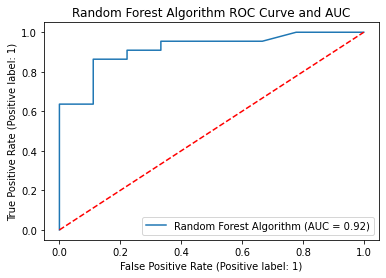

In [194]:
plot_roc_curve(ran_forest, X_test, y_test, name="Random Forest Algorithm")
plt.title("Random Forest Algorithm ROC Curve and AUC")
plt.plot([0,1], [0,1], "r--")
plt.show()

The AUC value is 0.92, which is the highest yet. Thus, the random forest model appears to be the best model. However there was underfitting.

In [195]:
random_forest_new = RandomForestClassifier(random_state=5)
random_forest_new

RandomForestClassifier(random_state=5)

In [ ]:
#chose the parameters to improve model

In [196]:
#n_estimators is the number of trees to be created, the default is 100. criterion measures the quality when splitting\
#decision trees. 
params = {"n_estimators" : [50,100,150,200], "criterion" : ["gini", "entropy"], \
          "max_features" : ["auto", "sqrt", "log2"], "bootstrap" : [True, False]}


In [197]:
#find the best parameters with GridSearchCV
random_forest_grid = GridSearchCV(random_forest_new, param_grid=params)

In [198]:
#train the model
random_forest_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=5),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [199]:
print("Best Parameters: ", random_forest_grid.best_params_)

Best Parameters:  {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 200}


In [200]:
#create new model with the above parameter results
random_forest_new2 = RandomForestClassifier(bootstrap=True, criterion="entropy", \
                                            max_features="auto", n_estimators=200, random_state=5)

In [201]:
#train the model
random_forest_new2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=5)

In [202]:
y_pred = random_forest_new2.predict(X_test)

In [203]:
print("The Random Forest Algorithm Accuracy after hyperparameter tuning is: ", accuracy_score(y_test, y_pred))

The Random Forest Algorithm Accuracy after hyperparameter tuning is:  0.9032258064516129


Cross validation is not needed since GridSearchCV does cross validation. 

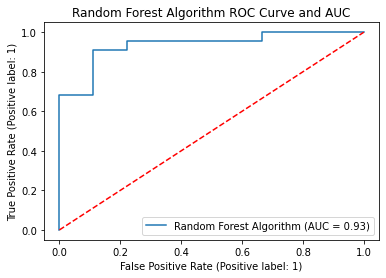

In [204]:
plot_roc_curve(random_forest_new2, X_test, y_test, name="Random Forest Algorithm")
plt.title("Random Forest Algorithm ROC Curve and AUC")
plt.plot([0,1], [0,1], "r--")
plt.show()

The AUC value is 0.93, which is the best yet. So, applying this model is the best choice. We can confidently use this model.

#### 6.0 Conclusion<a id=40></a>

#### The Random Forest Classifier Model provided the best results: 90.3% accuracy and a 93% for the AUC. Thus, the Random Forest Classifier model for this machine learning application provides the best results. 